In [27]:
# ----------
# User Instructions:
# 
# Define a function, search() that returns a list
# in the form of [optimal path length, row, col]. For
# the grid shown below, your function should output
# [11, 4, 5].
#
# If there is no valid path from the start point
# to the goal, your function should return the string
# 'fail'
# ----------

# Grid format:
#   0 = Navigable space
#   1 = Occupied space

grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0], # go up
         [ 0,-1], # go left
         [ 1, 0], # go down
         [ 0, 1]] # go right

delta_name = ['^', '<', 'v', '>']


def search(grid,init,goal,cost):
    take = [0,init[0],init[1]]
    # print("take:", take)
    open = []
    path = "fail"
    while True:
        if take[1] == goal[0] and take[2] == goal[1]:
            # print("success!")
            path = take
            break
        for dir in delta:
            cell = [take[0]+cost,take[1]+dir[0],take[2]+dir[1]]
            if cell[1] > -1 and cell[1] < len(grid) and cell[2] > -1 and\
            cell[2] < len(grid[0]) and grid[cell[1]][cell[2]] == 0:
                open.append(cell)
        grid[take[1]][take[2]] = 2
        if len(open) == 0:
            break
        open.sort()
        # print("open:", open)
        take = open[0]
        # print("take:", take)
        open.pop(0)
    return path

print(search(grid,init,goal,cost))

[11, 4, 5]


In [17]:
# -----------
# User Instructions:
# 
# Modify the function search so that it returns
# a table of values called expand. This table
# will keep track of which step each node was
# expanded.
#
# Make sure that the initial cell in the grid 
# you return has the value 0.
# ----------

grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0], # go up
         [ 0,-1], # go left
         [ 1, 0], # go down
         [ 0, 1]] # go right

delta_name = ['^', '<', 'v', '>']

def search(grid,init,goal,cost):
    # ----------------------------------------
    # modify code below
    # ----------------------------------------
    closed = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
    closed[init[0]][init[1]] = 1

    x = init[0]
    y = init[1]
    g = 0

    open = [[g, x, y]]
    expand = [[-1 for i in range(len(grid[0]))] for j in range(len(grid))]
    

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand
    
    step = 0

    while not found and not resign:

        if len(open) == 0:
            resign = True
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[1]
            y = next[2]
            g = next[0]
            expand[x][y] = step
            step += 1
            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost

                            open.append([g2, x2, y2])
                            closed[x2][y2] = 1
    return expand
expand = search(grid,init,goal,cost)
for i in range(len(expand)):
    print(expand[i])

[0, 1, -1, 11, 15, 18]
[2, 3, 5, 8, 12, 16]
[4, 6, -1, 13, -1, 19]
[7, 9, -1, 17, -1, 21]
[10, 14, -1, 20, -1, 22]


In [28]:
# -----------
# User Instructions:
#
# Modify the the search function so that it returns
# a shortest path as follows:
# 
# [['>', 'v', ' ', ' ', ' ', ' '],
#  [' ', '>', '>', '>', '>', 'v'],
#  [' ', ' ', ' ', ' ', ' ', 'v'],
#  [' ', ' ', ' ', ' ', ' ', 'v'],
#  [' ', ' ', ' ', ' ', ' ', '*']]
#
# Where '>', '<', '^', and 'v' refer to right, left, 
# up, and down motions. NOTE: the 'v' should be 
# lowercase.
#
# Your function should be able to do this for any
# provided grid, not just the sample grid below.
# ----------


# Sample Test case
grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def search():
    closed = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
    closed[init[0]][init[1]] = 1

    movement = [[-1 for row in range(len(grid[0]))] for col in range(len(grid))]
    path = [[' ' for row in range(len(grid[0]))] for col in range(len(grid))]

    x = init[0]
    y = init[1]
    g = 0

    open = [[g, x, y]]

    found = False  # flag that is set when search is complet
    resign = False # flag set if we can't find expand

    while not found and not resign:
        if len(open) == 0:
            resign = True
            return 'fail'
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[1]
            y = next[2]
            g = next[0]

            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            open.append([g2, x2, y2])
                            closed[x2][y2] = 1
                            movement[x2][y2] = i
    x, y = goal
    path[x][y] = '*'
    while x != init[0] or y != init[1]:
        i = movement[x][y]
        dx, dy = delta[i]
        x, y = x-dx, y-dy
        path[x][y] = delta_name[i]
    for i in range(len(movement)):
        print(movement[i])
    for i in range(len(path)):
        print(path[i])
    return path # make sure you return the shortest path.

In [31]:
delta_name.append('*')
path = search()
path_list = []
for i in range(len(path)):
    for j in range(len(path[0])):
        if path[i][j] in delta_name:
            path_list.append([i,j])
print(path_list)
for i in range(len(path)):
    print(path[i])

[-1, 3, -1, 0, 3, 3]
[2, 2, 3, 3, 3, 3]
[2, 2, -1, 2, -1, 2]
[2, 2, -1, 2, -1, 2]
[2, 2, -1, 2, -1, 2]
['>', 'v', ' ', ' ', ' ', ' ']
[' ', '>', '>', '>', '>', 'v']
[' ', ' ', ' ', ' ', ' ', 'v']
[' ', ' ', ' ', ' ', ' ', 'v']
[' ', ' ', ' ', ' ', ' ', '*']
[[0, 0], [0, 1], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [2, 5], [3, 5], [4, 5]]
['>', 'v', ' ', ' ', ' ', ' ']
[' ', '>', '>', '>', '>', 'v']
[' ', ' ', ' ', ' ', ' ', 'v']
[' ', ' ', ' ', ' ', ' ', 'v']
[' ', ' ', ' ', ' ', ' ', '*']


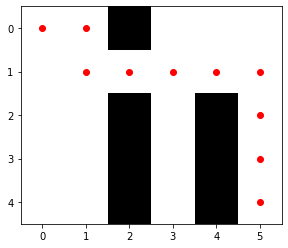

In [36]:
import matplotlib.pyplot as plt

# Visualization function
def visualize(grid, path):
    plt.imshow(grid, cmap='Greys')
    for i in range(len(path)):
        x, y = path[i]
        plt.scatter(y, x, c='r', marker='o')
    plt.show()

visualize(grid, path_list)


In [21]:
# -----------
# User Instructions:
#
# Modify the the search function so that it becomes
# an A* search algorithm as defined in the previous
# lectures.
#
# Your function should return the expanded grid
# which shows, for each element, the count when
# it was expanded or -1 if the element was never expanded.
# 
# If there is no path from init to goal,
# the function should return the string 'fail'
# ----------

grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 1, 0, 1, 1, 0],
        [0, 0, 0, 0, 1, 0]]
heuristic = [[9, 8, 7, 6, 5, 4],
             [8, 7, 6, 5, 4, 3],
             [7, 6, 5, 4, 3, 2],
             [6, 5, 4, 3, 2, 1],
             [5, 4, 3, 2, 1, 0]]

init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def search(grid,init,goal,cost,heuristic):
    # ----------------------------------------
    # modify the code below
    # ----------------------------------------
    closed = [[0 for col in range(len(grid[0]))] for row in range(len(grid))]
    closed[init[0]][init[1]] = 1

    expand = [[-1 for col in range(len(grid[0]))] for row in range(len(grid))]
    action = [[-1 for col in range(len(grid[0]))] for row in range(len(grid))]

    x = init[0]
    y = init[1]
    g = 0
    f = g + heuristic[x][y]

    open = [[f, g, x, y]]

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand
    count = 0
    
    while not found and not resign:
        if len(open) == 0:
            resign = True
            return "Fail"
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[2]
            y = next[3]
            g = next[1]
            f = next[0]
            expand[x][y] = count
            count += 1
            
            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            f2 = g2 + heuristic[x2][y2]
                            open.append([f2, g2, x2, y2])
                            closed[x2][y2] = 1

    return expand
    
for line in search(grid, init,goal,cost, heuristic):
    print(line) 

[0, -1, -1, -1, -1, -1]
[1, -1, 10, 11, 12, 13]
[2, -1, 9, -1, 14, 15]
[3, -1, 8, -1, -1, 16]
[4, 5, 6, 7, -1, 17]


In [29]:
# -----------
# User Instructions:
#
# Modify the the search function as A star algorithm so that it returns
# a shortest path as follows:
# 
# [['v', ' ', ' ', ' ', ' ', ' ']
# ['v', ' ', '>', '>', '>', 'v']
# ['v', ' ', '^', ' ', ' ', 'v']
# ['v', ' ', '^', ' ', ' ', 'v']
# ['>', '>', '^', ' ', ' ', '*']
#
# Where '>', '<', '^', and 'v' refer to right, left, 
# up, and down motions. NOTE: the 'v' should be 
# lowercase.
#
# Your function should be able to do this for any
# provided grid, not just the sample grid below.
# ----------


grid = [[0, 1, 0, 0, 0, 1],
        [0, 1, 0, 1, 0, 1],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 0],
        [0, 0, 0, 0, 1, 0]]

heuristic = [[9, 8, 7, 6, 5, 4],
             [8, 7, 6, 5, 4, 3],
             [7, 6, 5, 4, 3, 2],
             [6, 5, 4, 3, 2, 1],
             [5, 4, 3, 2, 1, 0]]

init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def search(grid,init,goal,cost,heuristic):
    closed = [[0 for col in range(len(grid[0]))] for row in range(len(grid))]
    closed[init[0]][init[1]] = 1

    movement = [[-1 for row in range(len(grid[0]))] for col in range(len(grid))]
    path = [[' ' for row in range(len(grid[0]))] for col in range(len(grid))]

    x = init[0]
    y = init[1]
    g = 0
    f = g + heuristic[x][y]

    open = [[f, g, x, y]]

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand
    count = 0
    
    while not found and not resign:
        if len(open) == 0:
            resign = True
            return "Fail"
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[2]
            y = next[3]
            g = next[1]
            f = next[0]
            count += 1
            
            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            f2 = g2 + heuristic[x2][y2]
                            open.append([f2, g2, x2, y2])
                            closed[x2][y2] = 1
                            movement[x2][y2] = i
    x, y = goal
    path[x][y] = '*'
    while x != init[0] or y != init[1]:
        i = movement[x][y]
        dx, dy = delta[i]
        x, y = x-dx, y-dy
        path[x][y] = delta_name[i]
    for i in range(len(movement)):
        pass
        # print(movement[i])
    for i in range(len(path)):
        pass
        # print(path[i])
    return path # make sure you return the shortest path.

In [30]:
for path in search(grid, init,goal,cost, heuristic):
    print(path) 

['v', ' ', ' ', ' ', ' ', ' ']
['v', ' ', ' ', ' ', ' ', ' ']
['v', ' ', '>', '>', '>', 'v']
['v', ' ', '^', ' ', ' ', 'v']
['>', '>', '^', ' ', ' ', '*']


[[0, 0], [1, 0], [2, 0], [2, 2], [2, 3], [2, 4], [2, 5], [3, 0], [3, 2], [3, 5], [4, 0], [4, 1], [4, 2], [4, 5]]
['v', ' ', ' ', ' ', ' ', ' ']
['v', ' ', ' ', ' ', ' ', ' ']
['v', ' ', '>', '>', '>', 'v']
['v', ' ', '^', ' ', ' ', 'v']
['>', '>', '^', ' ', ' ', '*']


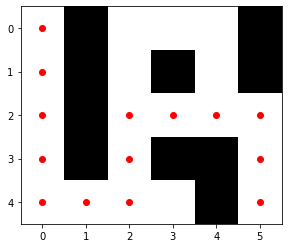

In [31]:
delta_name.append('*')
path = search(grid, init,goal,cost, heuristic)
path_list = []
for i in range(len(path)):
    for j in range(len(path[0])):
        if path[i][j] in delta_name:
            path_list.append([i,j])
print(path_list)
for i in range(len(path)):
    print(path[i])

visualize(grid, path_list)

In [45]:
# ----------
# User Instructions:
# 
# Create a function compute_value which returns
# a grid of values. The value of a cell is the minimum
# number of moves required to get from the cell to the goal. 
#
# If a cell is a wall or it is impossible to reach the goal from a cell,
# assign that cell a value of 99.
# ----------

grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 1, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0]]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1 # the cost associated with moving from a cell to an adjacent one

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']
cost_step = 1 # the cost associated with moving from a cell to an adjacent one. 

def compute_value(grid,goal,cost):
    # ----------------------------------------
    # insert code below
    # ----------------------------------------
    value = [[99 for x in range(len(grid[0]))] for y in range(len(grid))]
    # make sure your function returns a grid of values as 
    # demonstrated in the previous video.
    value[goal[0]][goal[1]] = 0
    openList = []
    openList.append([0, goal[0],goal[1]])
    while len(openList) != 0:
        openList.sort()
        currentCell = openList.pop(0)
        for i in range(len(delta)):
            targetX = currentCell[2] - delta[i][1]
            targetY = currentCell[1] - delta[i][0]
            if inGrid(grid, targetX, targetY):
                if grid[targetY][targetX] == 0 and value[targetY][targetX] == 99:
                    openList.append([currentCell[0]+cost, targetY, targetX])
                    value[targetY][targetX] = currentCell[0] + cost
    return value
    
    
def inGrid(grid, x, y):
    if x >= 0 and x < len(grid[0]) and y >= 0 and y < len(grid):
        return True
    else:
        return False

for line in compute_value(grid, goal, cost):
    print(line)


[15, 99, 7, 6, 5, 4]
[14, 99, 99, 5, 4, 3]
[13, 99, 99, 6, 99, 2]
[12, 99, 99, 7, 99, 1]
[11, 10, 9, 8, 99, 0]


In [37]:
# ----------
# User Instructions:
# 
# Write a function optimum_policy that returns
# a grid which shows the optimum policy for robot
# motion. This means there should be an optimum
# direction associated with each navigable cell from
# which the goal can be reached.
# 
# Unnavigable cells as well as cells from which 
# the goal cannot be reached should have a string 
# containing a single space (' '), as shown in the 
# previous video. The goal cell should have '*'.
# ----------

grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1 # the cost associated with moving from a cell to an adjacent one

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def optimum_policy(grid,goal,cost):
    # ----------------------------------------
    # modify code below
    # ----------------------------------------
    value = [[99 for row in range(len(grid[0]))] for col in range(len(grid))]
    change = True

    while change:
        change = False

        for x in range(len(grid)):
            for y in range(len(grid[0])):
                if goal[0] == x and goal[1] == y:
                    if value[x][y] > 0:
                        value[x][y] = 0

                        change = True

                elif grid[x][y] == 0:
                    for a in range(len(delta)):
                        x2 = x + delta[a][0]
                        y2 = y + delta[a][1]

                        if x2 >= 0 and x2 < len(grid) and y2 >= 0 and y2 < len(grid[0]) and grid[x2][y2] == 0:
                            v2 = value[x2][y2] + cost

                            if v2 < value[x][y]:
                                change = True
                                value[x][y] = v2
    
    policy = [[' ' for x in range(len(grid[0]))] for y in range(len(grid))]
    for x in range(len(grid[0])):
        for y in range(len(grid)):
            if value[y][x] == 99:
                continue
            if value[y][x] == 0:
                policy[y][x] = '*'
                continue
            surroundingCells = [99,99,99,99]
            for i in range(len(delta)):
                x2 = x + delta[i][1]
                y2 = y + delta[i][0]
                if x2 >= 0 and x2 < len(grid[0]) and y2 >= 0 and y2 < len(grid):
                    surroundingCells[i] = value[y2][x2]
            minVal = min(surroundingCells)
            for j in range(len(surroundingCells)):
                if surroundingCells[j] == minVal and minVal != 99:
                    policy[y][x] = delta_name[j]

    return policy

for line in optimum_policy(grid, goal, cost):
    print(line)

['v', ' ', '>', '>', '>', 'v']
['v', ' ', '>', '>', '>', 'v']
['v', ' ', '>', '>', '>', 'v']
['v', ' ', '>', '>', '>', 'v']
['>', '>', '>', '^', ' ', '*']


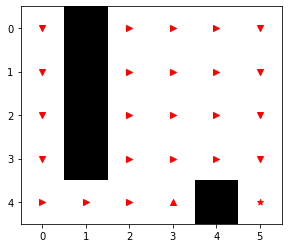

In [58]:
# Visualization function
def visualize_policy(grid, policy):
    plt.imshow(grid, cmap='Greys')
    for i in range(len(policy)):
        for j in range(len(policy[0])):
            pol = policy[i][j]
            plt.scatter(j, i, c='r', marker=f'{pol}')
    plt.show()

policy = optimum_policy(grid, goal, cost)
visualize_policy(grid, policy)

In [3]:
# ----------
# User Instructions:
# 
# Implement the function optimum_policy2D below.
#
# You are given a car in grid with initial state
# init. Your task is to compute and return the car's 
# optimal path to the position specified in goal; 
# the costs for each motion are as defined in cost.
#
# There are four motion directions: up, left, down, and right.
# Increasing the index in this array corresponds to making a
# a left turn, and decreasing the index corresponds to making a 
# right turn.

forward = [[-1,  0], # go up
           [ 0, -1], # go left
           [ 1,  0], # go down
           [ 0,  1]] # go right
forward_name = ['up', 'left', 'down', 'right']

# action has 3 values: right turn, no turn, left turn
action = [-1, 0, 1]
action_name = ['R', '#', 'L']

# EXAMPLE INPUTS:
# grid format:
#     0 = navigable space
#     1 = unnavigable space 
grid = [[1, 1, 1, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1]]

init = [4, 3, 0] # given in the form [row,col,direction]
                 # direction = 0: up
                 #             1: left
                 #             2: down
                 #             3: right
                
goal = [2, 0] # given in the form [row,col]

cost = [2, 1, 20] # cost has 3 values, corresponding to making 
                  # a right turn, no turn, and a left turn

# EXAMPLE OUTPUT:
# calling optimum_policy2D with the given parameters should return 
# [[' ', ' ', ' ', 'R', '#', 'R'],
#  [' ', ' ', ' ', '#', ' ', '#'],
#  ['*', '#', '#', '#', '#', 'R'],
#  [' ', ' ', ' ', '#', ' ', ' '],
#  [' ', ' ', ' ', '#', ' ', ' ']]
# ----------

def optimum_policy2D(grid,init,goal,cost):
    value = [[[999 for facing in range(len(forward))]\
        for col in range(len(grid[0]))]\
        for row in range(len(grid))]
    policy = [[[' ' for facing in range(len(forward))]\
        for col in range(len(grid[0]))]\
        for row in range(len(grid))]
    change = True
    
    while change:
        change = False
        
        for y in range(len(grid)):
            for x in range(len(grid[0])):
                for f in range(len(forward)):
                    if x == goal[1] and y == goal[0]:
                        if value[y][x][f] > 0:
                            value[y][x][f] = 0
                            policy[y][x][f] = '*'
                            change = True
                    elif grid[y][x] == 0:
                        for f2 in range(len(forward)):
                            x2 = x + forward[f2][1]
                            y2 = y + forward[f2][0]
                            if x2 >= 0 and x2 < len(grid[0]) and y2 >= 0 and y2 < len(grid) and grid[y2][x2] == 0:
                                targetVal = value[y2][x2][f2]
                                for a in range(len(action)):
                                    if (f + action[a]) % len(forward) == f2:
                                        v2 = targetVal + cost[a]
                                        if v2 < value[y][x][f]:
                                            value[y][x][f] = v2
                                            policy[y][x][f] = action_name[a]
                                            change = True
                                    
    policy2D = [[' ' for x in range(len(grid[0]))] for y in range(len(grid))]
    x = init[1]
    y = init[0]
    f = init[2]
    policy2D[y][x] = policy[y][x][f]

    while policy[y][x][f] != '*':
        if policy[y][x][f] == 'R':
            f = (f - 1) % 4
        elif policy[y][x][f] == 'L':
            f = (f + 1) % 4
        x += forward[f][1]
        y += forward[f][0]
        policy2D[y][x] = policy[y][x][f]
    return policy2D

for line in optimum_policy2D(grid,init,goal,cost):
    print(line)

[' ', ' ', ' ', 'R', '#', 'R']
[' ', ' ', ' ', '#', ' ', '#']
['*', '#', '#', '#', '#', 'R']
[' ', ' ', ' ', '#', ' ', ' ']
[' ', ' ', ' ', '#', ' ', ' ']
